In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os

from tqdm import tqdm
import glob
import seaborn as sns
import cv2
import io

import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.utils import shuffle
import ipywidgets as widgets
from tensorflow.keras.utils import to_categorical

# architecture Pare
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D

from sklearn.metrics import classification_report, confusion_matrix

In [2]:
labels = ["broadleaf", "grass", "soil", "soybean"]

In [3]:
X  =[] 
Y = [] 
image_size = (110, 100)

for i in labels:
    Datasetspath = "../input/weed-detection-in-soybean-crops/dataset/" + i + "/"
    print(Datasetspath)
    fileRead = glob.glob(Datasetspath + "*")
    print(len(fileRead))
    
    for file in fileRead:
        image = cv2.imread(file)
        img = cv2.resize(image, image_size)
        X.append(img)
        Y.append(i)
X = np.array(X)
Y = np.array(Y)

../input/weed-detection-in-soybean-crops/dataset/broadleaf/
1191
../input/weed-detection-in-soybean-crops/dataset/grass/
3520
../input/weed-detection-in-soybean-crops/dataset/soil/
3249
../input/weed-detection-in-soybean-crops/dataset/soybean/
7376


In [4]:
for i in labels:
    Datasetspath = "../input/weed-detection-in-soybean-crops/dataset/" + i + "/"
    print(Datasetspath)
    fileRead = glob.glob(Datasetspath + "*")
    print(fileRead[1])
#     break

../input/weed-detection-in-soybean-crops/dataset/broadleaf/
../input/weed-detection-in-soybean-crops/dataset/broadleaf/274.tif
../input/weed-detection-in-soybean-crops/dataset/grass/
../input/weed-detection-in-soybean-crops/dataset/grass/659.tif
../input/weed-detection-in-soybean-crops/dataset/soil/
../input/weed-detection-in-soybean-crops/dataset/soil/659.tif
../input/weed-detection-in-soybean-crops/dataset/soybean/
../input/weed-detection-in-soybean-crops/dataset/soybean/5623.tif


In [5]:
X.shape, Y.shape

((15336, 100, 110, 3), (15336,))

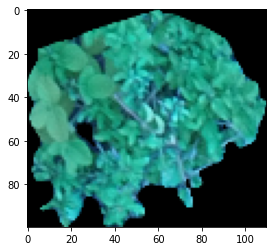

In [6]:
plt.imshow(X[0])

In [7]:
# X[0]

In [8]:
Y[0]

'broadleaf'

In [9]:
Temp_y = []
for i in Y:
    Temp_y.append(labels.index(i))
Y = to_categorical(Temp_y)
Y[0]

array([1., 0., 0., 0.], dtype=float32)

In [10]:
Y.shape

(15336, 4)

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=101)

In [12]:
X_train.shape, Y_train.shape

((10735, 100, 110, 3), (10735, 4))

In [13]:
X_test.shape, Y_test.shape

((4601, 100, 110, 3), (4601, 4))

In [14]:
model = Sequential()

#1st Layer
model.add(Conv2D(32, kernel_size=(3, 3), strides = (1, 1), padding = "valid", activation = "relu", input_shape=(110, 100, 3)))
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = "valid", data_format = None))

#2nd Layer
model.add(Conv2D(16, kernel_size=(3, 3), strides = (1, 1), padding = "valid", activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = "valid", data_format = None))

# 3rd Layer
model.add(Conv2D(8, kernel_size=(3, 3), strides = (1, 1), padding = "valid", activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = "valid", data_format = None))

#4th Layer
model.add(Conv2D(4, kernel_size=(3, 3), strides = (1, 1), padding = "valid", activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = "valid", data_format = None))


#fully Connected NN
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(4, activation="softmax"))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 108, 98, 32)       896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 54, 49, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 52, 47, 16)        4624      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 26, 23, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 21, 8)         1160      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 10, 8)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 8, 4)          2

In [16]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

In [17]:
model.compile(loss = "categorical_crossentropy",
             optimizer = optimizer,
             metrics = ["accuracy"])

In [18]:
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs = 30, batch_size = 2, verbose = 1)

Epoch 1/30
5368/5368 [==============================] - 30s 4ms/step - loss: 1.0879 - accuracy: 0.5585 - val_loss: 0.6607 - val_accuracy: 0.7322
Epoch 2/30
5368/5368 [==============================] - 23s 4ms/step - loss: 0.5572 - accuracy: 0.7842 - val_loss: 0.4535 - val_accuracy: 0.8292
Epoch 3/30
5368/5368 [==============================] - 23s 4ms/step - loss: 0.4374 - accuracy: 0.8331 - val_loss: 0.3770 - val_accuracy: 0.8518
Epoch 4/30
5368/5368 [==============================] - 23s 4ms/step - loss: 0.3614 - accuracy: 0.8597 - val_loss: 0.3284 - val_accuracy: 0.8685
Epoch 5/30
5368/5368 [==============================] - 23s 4ms/step - loss: 0.3165 - accuracy: 0.8739 - val_loss: 0.3204 - val_accuracy: 0.8739
Epoch 6/30
5368/5368 [==============================] - 23s 4ms/step - loss: 0.2841 - accuracy: 0.8918 - val_loss: 0.2969 - val_accuracy: 0.8942
Epoch 7/30
5368/5368 [==============================] - 23s 4ms/step - loss: 0.2419 - accuracy: 0.9093 - val_loss: 0.2848 - val_ac

Model Accuracy



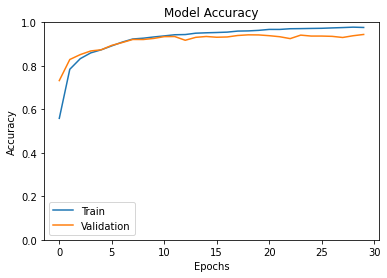

In [19]:
ax = plt.gca()
ax.set_ylim([0, 1])
print("Model Accuracy\n")
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'])
plt.show()

Model Loss



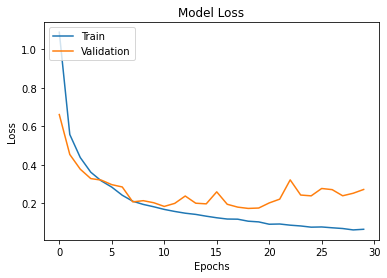

In [20]:
ax = plt.gca()
# ax.set_ylim([0, 1])
print("Model Loss\n")
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()